In [1]:
# Install kaggle library
! pip install kaggle

In [7]:
# Download the kaggle.json file from accounts settings in kaggle then upload in the directory
# Move the kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

In [10]:
# Download the dataset
! kaggle datasets download niteshfre/chessman-image-dataset

 99% 57.0M/57.6M [00:00<00:00, 99.0MB/s]
100% 57.6M/57.6M [00:00<00:00, 88.1MB/s]


In [11]:
# Unzip the dataset
! unzip chessman-image-dataset.zip

Archive:  chessman-image-dataset.zip
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000013.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000015.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000016.jpg  
  i

In [18]:
# Necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *

In [30]:
# Split the dataset into train and validation
image_size = (48,48)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'Chessman-image-dataset/Chess/',
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = image_size,
    batch_size = batch,
    label_mode = 'categorical'
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [31]:
validation = keras.preprocessing.image_dataset_from_directory(
    'Chessman-image-dataset/Chess/',
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = image_size,
    batch_size = batch,
    label_mode = 'categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [46]:
# define a function to display images
def display_samples(dataset, n_samples, classes_name):
  plt.figure(figsize = (8,8))
  for images, labels in dataset.take(1):
    for i in range(n_samples):
      ax = plt.subplot(3, 3, i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(classes_name[np.argmax(labels[i])])
      plt.axis("off")

(48, 48, 3)


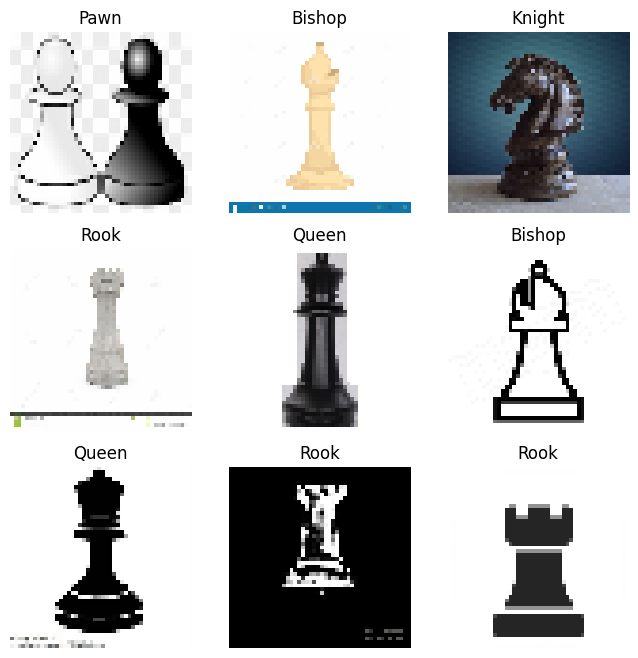

In [49]:
# display images
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
  for i in range(1):
    print(images[i].shape)

In [34]:
# counts the entries for each class in training set
class_names = train.class_names
labels = np.array([])
for _, label in train:
  labels = np.concatenate((labels, np.argmax(label, axis = -1)))
_, counts = np.unique(labels, return_counts = True)

In [35]:
counts

array([71, 62, 85, 83, 64, 77])

*Build a Convolutional neural network model*
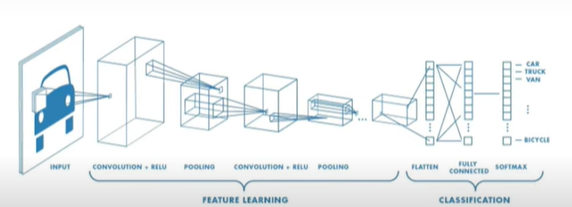

*In Mathematics, convolutions is a mathematical operation on two functions (f and g) that produces a third fucntion () that expresses* **how the shape of one is modified by the other.**




In [50]:
# build three layered sequential model
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",
                 activation = "relu",
                 input_shape = image_size + (3,),
                 kernel_regularizer = reg,
                 ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), padding = "same",
                 activation = "relu",
                 input_shape = image_size + (3,),
                 kernel_regularizer = reg,
                 ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)             

In [51]:
# speicify the loss
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)
# set number of epochs
epochs = 8

model.fit(
    train,
    epochs = epochs,
    validation_data = validation
);

Epoch 1/8
14/14 [==============================] - 10s 372ms/step - loss: 2.4517 - accuracy: 0.1946 - val_loss: 3.8285 - val_accuracy: 0.2455
Epoch 2/8
14/14 [==============================] - 6s 242ms/step - loss: 1.9921 - accuracy: 0.2195 - val_loss: 2.4037 - val_accuracy: 0.1909
Epoch 3/8
14/14 [==============================] - 8s 315ms/step - loss: 2.0080 - accuracy: 0.2738 - val_loss: 2.2709 - val_accuracy: 0.3182
Epoch 4/8
14/14 [==============================] - 6s 284ms/step - loss: 1.8101 - accuracy: 0.3348 - val_loss: 2.1785 - val_accuracy: 0.3091
Epoch 5/8
14/14 [==============================] - 7s 236ms/step - loss: 1.5541 - accuracy: 0.4367 - val_loss: 1.8483 - val_accuracy: 0.3091
Epoch 6/8
14/14 [==============================] - 8s 388ms/step - loss: 1.4498 - accuracy: 0.4796 - val_loss: 1.8840 - val_accuracy: 0.2364
Epoch 7/8
14/14 [==============================] - 6s 237ms/step - loss: 1.2924 - accuracy: 0.5181 - val_loss: 3.8590 - val_accuracy: 0.2818
Epoch 8/8
14

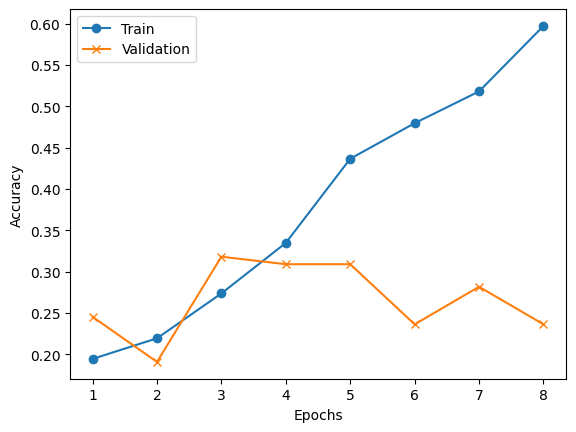

In [52]:
# plot the accuracy
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history["accuracy"], '-o', label = 'Train')
plt.plot(epochs_range, model.history.history["val_accuracy"], '-x', label = 'Validation')

plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.legend()

In [53]:
y_pred = np.argmax(model.predict(validation), axis = -1)

predictions = np.array([])
labels = np.array([])
for x, y in validation:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis = -1)])

4/4 [==============================] - 1s 36ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 126ms/step


<Axes: >

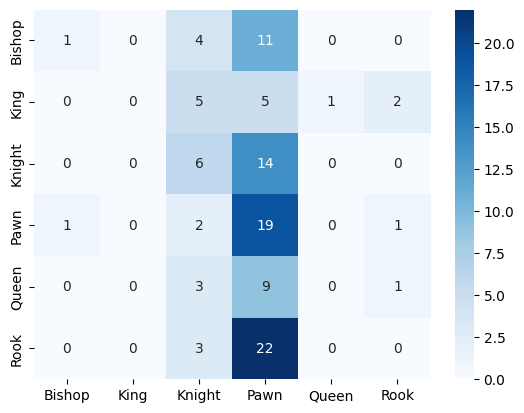

In [54]:
conf = tf.math.confusion_matrix(labels = labels, predictions = predictions)
sns.heatmap(conf, annot = True, cmap = 'Blues', yticklabels = class_names, xticklabels = class_names)

In [ ]:
# The dataset doesn't seem to be enough to learn and perform well on validation data.